#**Topic 5 PArt II – Ensemble methods and Random Forests**

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/JavierBas/IMLEF-MQuEA/blob/main/Course%20content/Notebooks/Topic%205/Topic_5_Part_II_Ensemble_methods_and_Random_Forests.ipynb)

# Setup

This project requires Python 3.7 or above:

In [ ]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/ensembles` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res:

In [2]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ensembles"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Voting Classifiers

Let's build a voting classifier.
First, let's create some radom data using `make_moons`. It creates a number of observations with *moon* shape, asigning a 0/1 label to each of them.

In [16]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

Now, let's estiamte three different in nature classifiers: SVC, Logistic Regression, and RF. Then, estimate a *VotingClassifier*, which aggregates the "votes"

In [41]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(random_state=42))
        
    ]
)
voting_clf.fit(X_train, y_train)

We use the following loop to extract the score of each method (*learner*)
This would be equivalent to do, separately:
- `voting_clf.named_estimators_.lr.score(X_test, y_test)`
- `voting_clf.named_estimators_.rf.score(X_test, y_test)`
- `voting_clf.named_estimators_.svc.score(X_test, y_test)` 

In [42]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, "=", clf.score(X_test, y_test))

lr = 0.864
rf = 0.896
svc = 0.896


An the prediction of the Voting Classifier (aggregator, ensemble)... is:

In [43]:
voting_clf.score(X_test, y_test)

0.92

Which is indeed higher than the score of each individual algorithm. This is, ensembling the learners provide a better result.

# Random Forests

In [55]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16,
                                 n_jobs=-1, random_state=42) # n_jobs = -1 is for using all cores in your computer
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

Score

In [56]:
rnd_clf.score(X_test, y_test)

0.92

## Feature Importance

Let's estimate a random forest for the *iris* dataset

In [59]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris.data, iris.target)


RandomForestClassifier(n_estimators=500, random_state=42)

Feature Importances are obtained with the `feature_importances_` method

In [61]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

But this loop presents the importances better ( although not ordered)

In [60]:
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print(round(score, 2), name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


If we run a RF in the *mnist* dataset and plot the importance of each pixel, we obtained the following interesting chart (it takes one or two minutes to run)

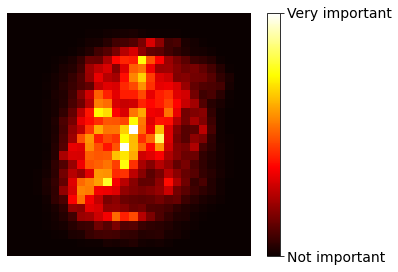

In [62]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)

# This code is for generating the plot, a heatmap
heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
save_fig("mnist_feature_importance_plot")
plt.show()